# Malia Lomano Luti Bonds Porfolio (U.S Government Bonds ETFs)

https://www.investopedia.com/articles/investing/080515/top-4-us-government-bonds-etfs.asp

## Government Bonds ETFs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SHY','ITE','VGLT','SPIP']
start = '2011-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  4 of 4 downloaded


,ITE,SHY,SPIP,VGLT
Date,,,,
2011-01-03,50.938450,77.864304,21.982388,46.714367
2011-01-04,50.964535,77.845726,22.061167,46.434967
2011-01-05,50.703655,77.706635,21.957502,45.868416
2011-01-06,50.790611,77.790100,22.007259,45.845135
2011-01-07,51.042774,77.901390,22.102640,46.108990


In [3]:
df.tail()

,ITE,SHY,SPIP,VGLT
Date,,,,
2018-12-24,58.262810,81.967827,26.289839,73.037865
2018-12-26,58.095215,81.889244,26.231201,72.303665
2018-12-27,58.213520,81.977661,26.240973,72.303665
2018-12-28,58.430397,82.095512,26.309383,72.861641
2018-12-31,58.706436,82.124985,26.333817,73.135750


In [4]:
df.min()

ITE     50.397202
SHY     77.574585
SPIP    21.560375
VGLT    44.608959
dtype: float64

In [5]:
df.max()

ITE     58.706436
SHY     82.124985
SPIP    27.127893
VGLT    80.533936
dtype: float64

In [6]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
8 years


### Starting Cash with 100k to invest in Bonds

In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
ITE: 25000.0
SHY: 25000.0
SPIP: 25000.0
VGLT: 25000.0


In [8]:
print('Number of Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
ITE: 490
SHY: 321
SPIP: 1137
VGLT: 535


In [9]:
print('Beginning Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ITE: $24959.84
SHY: $24994.44
SPIP: $24993.98
VGLT: $24992.19


In [10]:
print('Current Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ITE: $28766.15
SHY: $26362.12
SPIP: $29941.55
VGLT: $39127.63


In [11]:
result = []
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $124197.45


In [12]:
# Calculate Daily Returns
returns = df.pct_change()
returns = returns.dropna()

In [13]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

ITE     0.000072
SHY     0.000027
SPIP    0.000095
VGLT    0.000251
dtype: float64


In [14]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

ITE     0.001601
SHY     0.000511
SPIP    0.003316
VGLT    0.007557
dtype: float64


In [15]:
# Define weights for the portfolio
weights = np.array([0.50, 0.10, 0.20, 0.20])

In [16]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

           ITE       SHY      SPIP      VGLT
ITE   0.000640  0.000156  0.000973  0.002325
SHY   0.000156  0.000065  0.000252  0.000538
SPIP  0.000973  0.000252  0.002749  0.004889
VGLT  0.002325  0.000538  0.004889  0.014277


In [17]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [18]:
# Print the portfolio return
print(portReturn)

0.00010795191404985887


In [19]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [20]:
returns.head()

,ITE,SHY,SPIP,VGLT,Portfolio
Date,,,,,
2011-01-04,0.000512,-0.000239,0.003584,-0.005981,-0.000247
2011-01-05,-0.005119,-0.001787,-0.004699,-0.012201,-0.006118
2011-01-06,0.001715,0.001074,0.002266,-0.000508,0.001317
2011-01-07,0.004965,0.001431,0.004334,0.005755,0.004643
2011-01-10,0.001533,0.000476,0.002626,0.008248,0.002989


In [21]:
returns.tail()

,ITE,SHY,SPIP,VGLT,Portfolio
Date,,,,,
2018-12-24,0.002035,0.000839,0.001303,0.004524,0.002267
2018-12-26,-0.002877,-0.000959,-0.002230,-0.010052,-0.003991
2018-12-27,0.002036,0.001080,0.000373,0.000000,0.001201
2018-12-28,0.003726,0.001438,0.002607,0.007717,0.004071
2018-12-31,0.004724,0.000359,0.000929,0.003762,0.003336


In [22]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                 ITE       SHY      SPIP      VGLT  Portfolio
Date                                                         
2018-12-24  1.143788  1.052701  1.195950  1.563499   1.227141
2018-12-26  1.140498  1.051692  1.193283  1.547782   1.222244
2018-12-27  1.142821  1.052827  1.193727  1.547782   1.223711
2018-12-28  1.147078  1.054341  1.196839  1.559727   1.228694
2018-12-31  1.152497  1.054719  1.197951  1.565594   1.232793


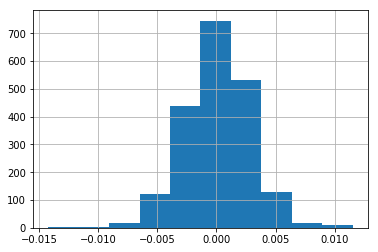

In [23]:
returns['Portfolio'].hist()
plt.show()

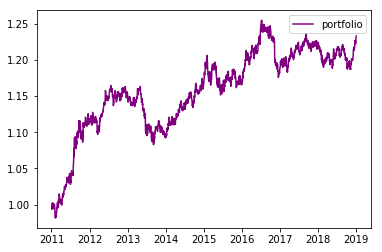

In [24]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [25]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.010795191404985863
Std. dev:  0.27854649744287124
skew:  -0.101696875542682
kurt:  1.283695711864163


In [26]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

4.3999999999999995%


In [27]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

0.19%


In [28]:
# Calculate total return and annualized return from price data 
total_return = returns['Portfolio'][-1] - returns['Portfolio'][0]
                
# Annualize the total return over 5 year 
annualized_return = ((1+total_return)**(1/8))-1

In [29]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [30]:
# Calculate the Sharpe ratio 
rf = 0.001
sharpe_ratio = (annualized_return - rf) / vol_port
print(sharpe_ratio)

-0.01255095086334714


In [31]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.010795191404985863
--------------------------------------------------
Downside risk:
ITE          0.114135
SHY          0.041097
SPIP         0.244469
VGLT         0.517764
Portfolio    0.180119
dtype: float64
--------------------------------------------------
Sortino ratio:
ITE          -8.666971
SHY         -24.070001
SPIP         -4.046333
VGLT         -1.910533
Portfolio    -5.491941
dtype: float64


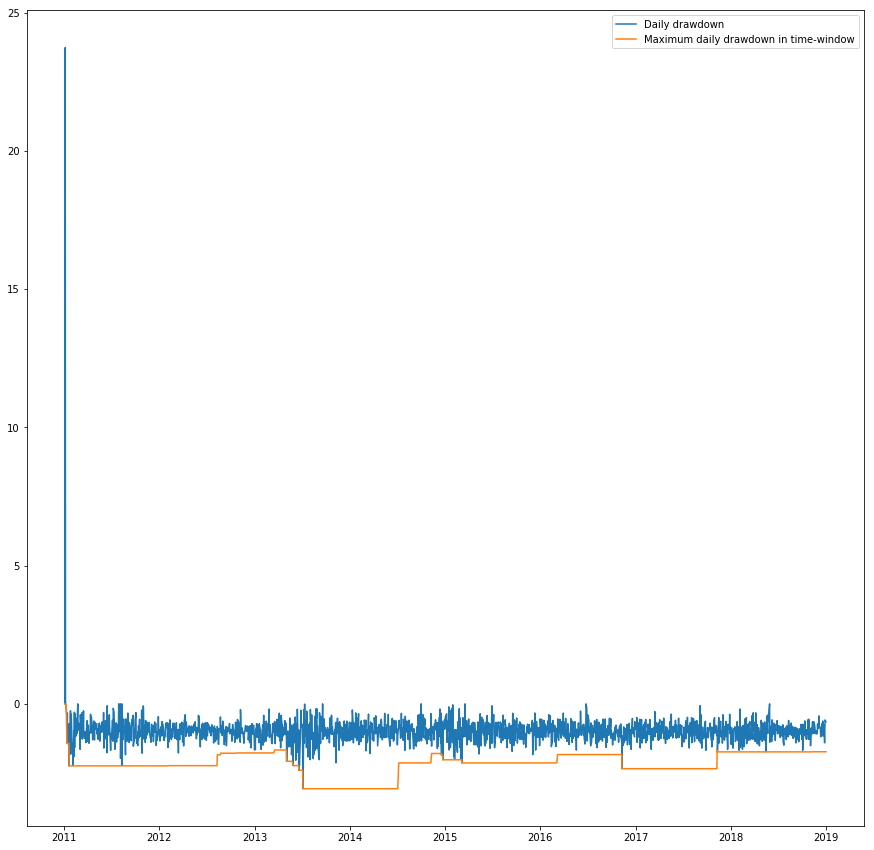

In [32]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

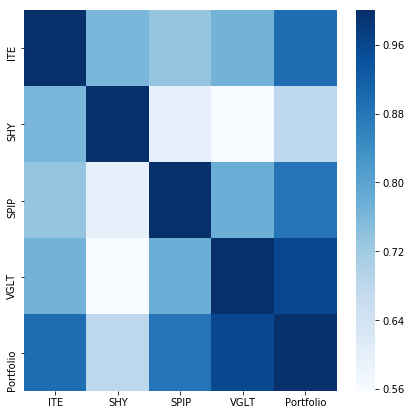

In [33]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

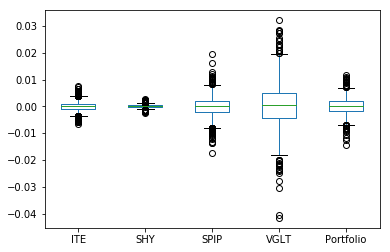

In [34]:
# Box plot
returns.plot(kind='box')

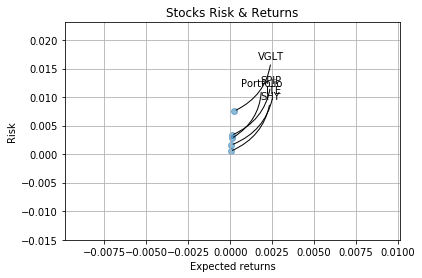

In [35]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

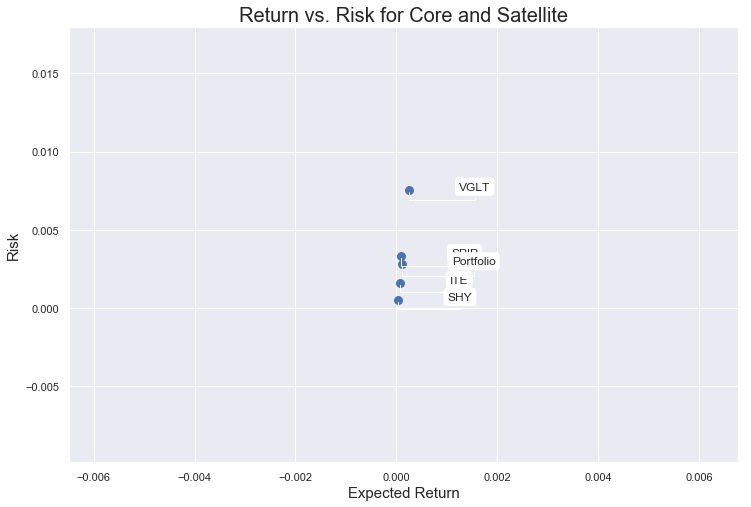

In [36]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Core and Satellite", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [37]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risk:")
print(rets.std())

Stock returns: 
ITE          0.000072
SHY          0.000027
SPIP         0.000095
VGLT         0.000251
Portfolio    0.000108
dtype: float64
--------------------------------------------------
Stock risk:
ITE          0.001601
SHY          0.000511
SPIP         0.003316
VGLT         0.007557
Portfolio    0.002785
dtype: float64


In [38]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
SHY,0.000027,0.000511
ITE,0.000072,0.001601
SPIP,0.000095,0.003316
Portfolio,0.000108,0.002785
VGLT,0.000251,0.007557


In [39]:
table.sort_values(by='Risk')

,Returns,Risk
SHY,0.000027,0.000511
ITE,0.000072,0.001601
Portfolio,0.000108,0.002785
SPIP,0.000095,0.003316
VGLT,0.000251,0.007557


In [40]:
rf = 0.001
table['Sharpe_Ratio'] = ((table['Returns'] - rf) / table['Risk']) * np.sqrt(252)
table

,Returns,Risk,Sharpe_Ratio
ITE,0.000072,0.001601,-9.205392
SHY,0.000027,0.000511,-30.249100
SPIP,0.000095,0.003316,-4.330849
VGLT,0.000251,0.007557,-1.572362
Portfolio,0.000108,0.002785,-5.083828
